In [1]:
import numpy as np
from patsy import dmatrix
from matplotlib import pyplot as plt

import statsmodels.api as sm
from pygam import LinearGAM, s, GAM

import warnings 
warnings.filterwarnings('ignore')

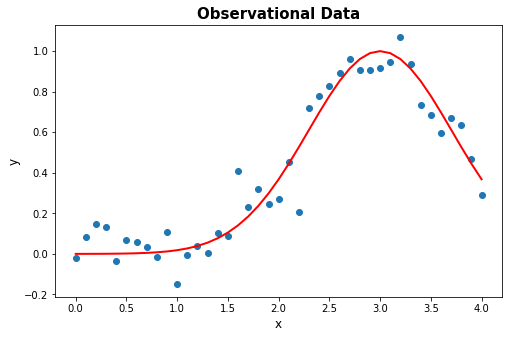

In [2]:
# DGM 1: Truncated normal density
def ffun(x):
    return np.exp(-(x-3)**2)

nn = 41
xx = np.linspace(0, 4, nn)
np.random.seed(2019)
yy = ffun(xx) + 0.1*np.random.normal(0, 1, len(xx))

plt.figure(1, figsize=(8, 5))
plt.plot(xx, yy, 'o')
plt.plot(xx, ffun(xx), color="red", LineWidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Observational Data', fontsize=15, fontweight="bold")
plt.show()

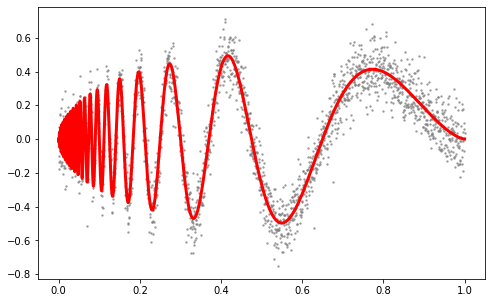

In [5]:
# DGM 2: Doppler Function
def doppler(DataNum, noise_level):
    x = np.linspace(0, 1, DataNum)
    y_wo_noise = np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+0.05))
    y_with_noise = y_wo_noise + noise_level*np.random.normal(0, 1, DataNum) 
    return x, y_wo_noise, y_with_noise

n = 2000
x, y_wo_noise, y_with_noise = doppler(n, 0.1)
plt.figure(1, figsize=(8, 5))
plt.plot(x, y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
plt.plot(x, y_wo_noise, color="red", LineWidth=3)
plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


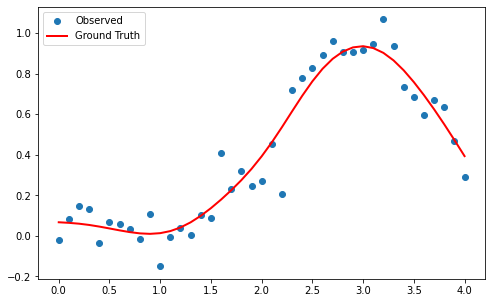

In [6]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0))
gam_pbs.gridsearch(xx.reshape(-1,1),yy)
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [7]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.0957
Link Function:                     IdentityLink Log Likelihood:                                 -1495.5101
Number of Samples:                           41 AIC:                                             3005.2117
                                                AICc:                                            3008.7033
                                                GCV:                                                0.0144
                                                Scale:                                              0.0106
                                                Pseudo R-Squared:                                    0.932
Feature Function                  Lam

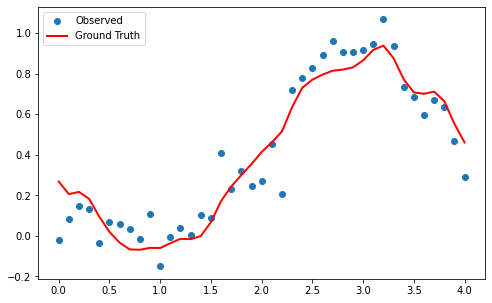

In [8]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0), n_splines=50)
gam_pbs.fit(xx.reshape(-1,1),yy)
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [58]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.9606
Link Function:                     IdentityLink Log Likelihood:                                  -807.9419
Number of Samples:                           41 AIC:                                             1637.8049
                                                AICc:                                            1646.8337
                                                GCV:                                                0.0288
                                                Scale:                                              0.0165
                                                Pseudo R-Squared:                                   0.9058
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


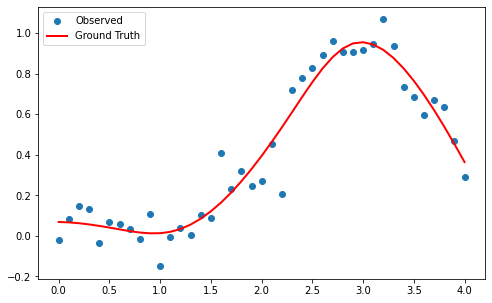

In [9]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0), n_splines=10)
gam_pbs.gridsearch(xx.reshape(-1,1),yy, lam = [0.1, 1, 10, 100, 1000])
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [60]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.2769
Link Function:                     IdentityLink Log Likelihood:                                 -1472.3335
Number of Samples:                           41 AIC:                                             2959.2208
                                                AICc:                                            2962.9019
                                                GCV:                                                0.0147
                                                Scale:                                              0.0107
                                                Pseudo R-Squared:                                   0.9317
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


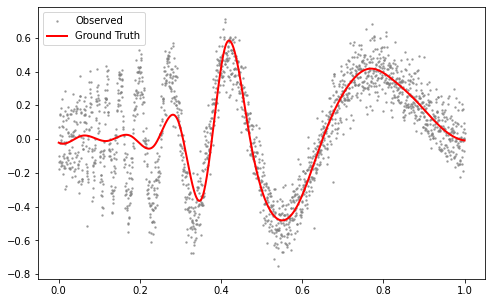

In [10]:
gam_pbs = LinearGAM(s(0))
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise)
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [11]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.3391
Link Function:                     IdentityLink Log Likelihood:                                -31294.1572
Number of Samples:                         2000 AIC:                                            62628.9926
                                                AICc:                                           62629.4313
                                                GCV:                                                0.0275
                                                Scale:                                               0.027
                                                Pseudo R-Squared:                                   0.7105
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


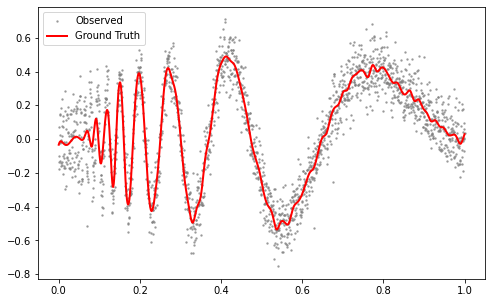

In [12]:
gam_pbs = LinearGAM(s(0), fit_intercept=True, n_splines=100, max_iter=100)
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise)
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [13]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     87.1489
Link Function:                     IdentityLink Log Likelihood:                                -68492.7622
Number of Samples:                         2000 AIC:                                           137161.8222
                                                AICc:                                          137170.0472
                                                GCV:                                                0.0138
                                                Scale:                                              0.0127
                                                Pseudo R-Squared:                                   0.8686
Feature Function                  Lam

100% (2 of 2) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01


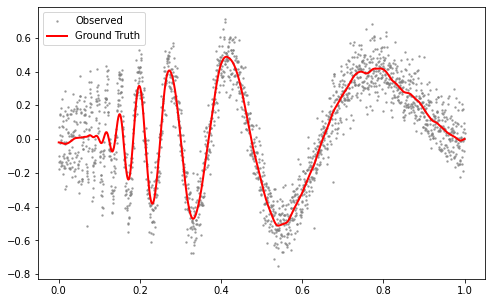

In [14]:
gam_pbs = LinearGAM(s(0), fit_intercept=True, n_splines=300, max_iter=100)
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise, lam = [100, 1000])
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [15]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.2081
Link Function:                     IdentityLink Log Likelihood:                                -60857.6308
Number of Samples:                         2000 AIC:                                           121823.6778
                                                AICc:                                          121826.7555
                                                GCV:                                                0.0151
                                                Scale:                                              0.0144
                                                Pseudo R-Squared:                                    0.848
Feature Function                  Lam